# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# data imports

In [2]:
# Load the DataFrame from the CSV file
df = pd.read_csv('data.csv',index_col = 0)

In [3]:
df.head(1)

,name,id,amount,transaction,access_time,town,days_between,recent_activity
68,Angela Baker,52cba580-f1bc-4005-84e5-500331f9a5f7,-1217,withdraw,2022-05-18 23:11:26.534868,New Lisaton,0.0,365 days 23:40:51.024277


# function build

# Generate Charts and Save to Charts

In [6]:
import os

# Create a directory to save the charts
output_dir = 'chart_outputs'
os.makedirs(output_dir, exist_ok=True)

def save_charts_to_folder(ide):
    # Filter the DataFrame for the given ID
    df_id = df[df['id'] == ide]

    # Extract the user name
    user_name = df_id['name'].iloc[0]

    # Create a subfolder for the user
    user_folder = os.path.join(output_dir, user_name)
    os.makedirs(user_folder, exist_ok=True)

    # Calculate the total deposits and withdrawals
    total_deposits = df_id[df_id['transaction'] == 'deposit']['amount'].sum()
    total_withdrawals = df_id[df_id['transaction'] == 'withdraw']['amount'].sum()

    # Prepare the data for the diverging stacked bar chart
    categories = ['Deposits', 'Withdrawals']
    values = [total_deposits, total_withdrawals]

    # Generate the diverging stacked bar chart
    plt.figure(figsize=(6, 6))
    plt.bar(categories, [max(value, 0) for value in values], color='green')
    plt.bar(categories, [min(value, 0) for value in values], color='red')
    plt.xlabel('Transaction Type')
    plt.ylabel('Amount')
    plt.title(f'Total Deposits and Withdrawals - ID: {ide} - User: {user_name}')

    # Save the chart to the user's subfolder with the ID as the filename
    chart_filename = os.path.join(user_folder, f'{ide}_chart.png')
    plt.savefig(chart_filename)
    plt.close()

    # Generate the line plot for standing amount
    df_id['Standing Amount'] = df_id['amount'].cumsum()
    plt.figure(figsize=(10, 6))
    plt.plot(df_id['access_time'], df_id['Standing Amount'])
    plt.xlabel('Access Time')
    plt.ylabel('Standing Amount')
    plt.title(f'Standing Amount Over Time - ID: {ide} - User: {user_name}')
    plt.xticks(rotation=45)

    # Save the chart to the user's subfolder with the ID as the filename
    lineplot_filename = os.path.join(user_folder, f'{ide}_lineplot.png')
    plt.savefig(lineplot_filename)
    plt.close()

    # Generate the count plot for transaction types
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_id, x='transaction')
    plt.xlabel('Transaction')
    plt.ylabel('Count')
    plt.title(f'Transaction Type Count - ID: {ide} - User: {user_name}')

    # Save the chart to the user's subfolder with the ID as the filename
    countplot_filename = os.path.join(user_folder, f'{ide}_countplot.png')
    plt.savefig(countplot_filename)
    plt.close()

    # Return the filenames of the saved charts
    return {
        'chart_filename': chart_filename,
        'lineplot_filename': lineplot_filename,
        'countplot_filename': countplot_filename
    }


KeyboardInterrupt: 

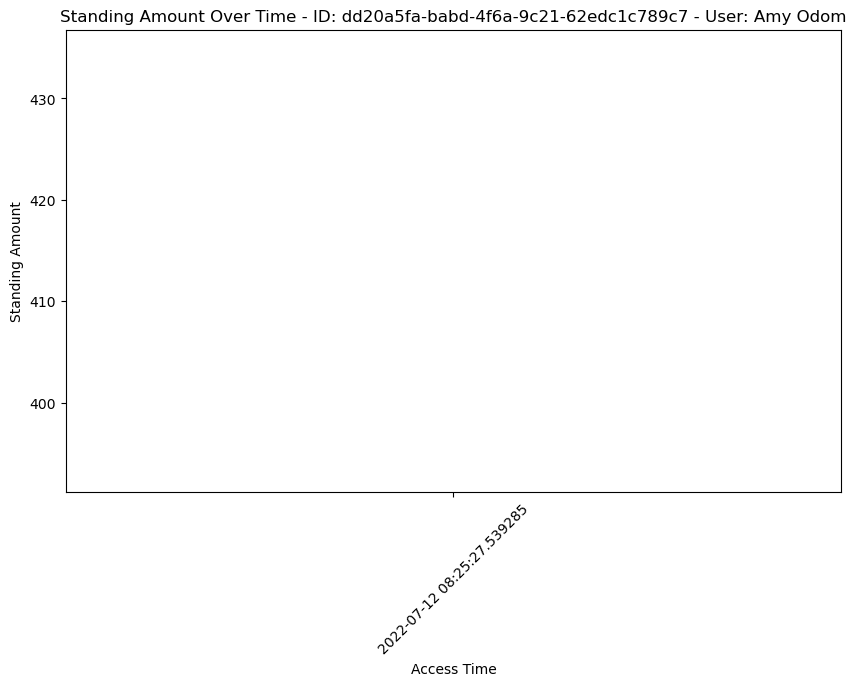

In [7]:
# Generate charts for each unique ID in the DataFrame
unique_ids = df['id'].unique()
for ide in unique_ids:
    save_charts_to_folder(ide)

# Generate Visuals in batchs and save to charts

In [ ]:
# Create a directory to save the charts
output_dir = 'chart_outputs'
os.makedirs(output_dir, exist_ok=True)

def save_charts_to_folder(df, batch_size=10):
    # Get the unique customer IDs in the DataFrame
    customer_ids = df['id'].unique()

    # Create a dictionary to store the filenames of the saved charts
    chart_filenames = {}

    # Divide the customer IDs into batches
    num_batches = len(customer_ids) // batch_size
    if len(customer_ids) % batch_size != 0:
        num_batches += 1

    for batch_index in range(num_batches):
        # Get the start and end indices for the current batch
        start_index = batch_index * batch_size
        end_index = (batch_index + 1) * batch_size

        # Extract the customer IDs for the current batch
        batch_customer_ids = customer_ids[start_index:end_index]

        # Process the current batch of customer IDs
        for customer_id in batch_customer_ids:
            # Filter the DataFrame for the current customer ID
            df_id = df[df['id'] == customer_id]

            # Rest of the chart generation code here...

            # Store the filenames of the saved charts in the dictionary
            chart_filenames[customer_id] = {
                'chart_filename': chart_filename,
                'lineplot_filename': lineplot_filename,
                'countplot_filename': countplot_filename
            }

    # Return the filenames of the saved charts
    return chart_filenames


In [ ]:
# Generate charts for each unique ID in the DataFrame
unique_ids = df['id'].unique()
for ide in unique_ids:
    save_charts_to_folder(ide)